## CUSTOMER SEGMENTATION: KMEANS & HIERARCHICAL CLUSTERING

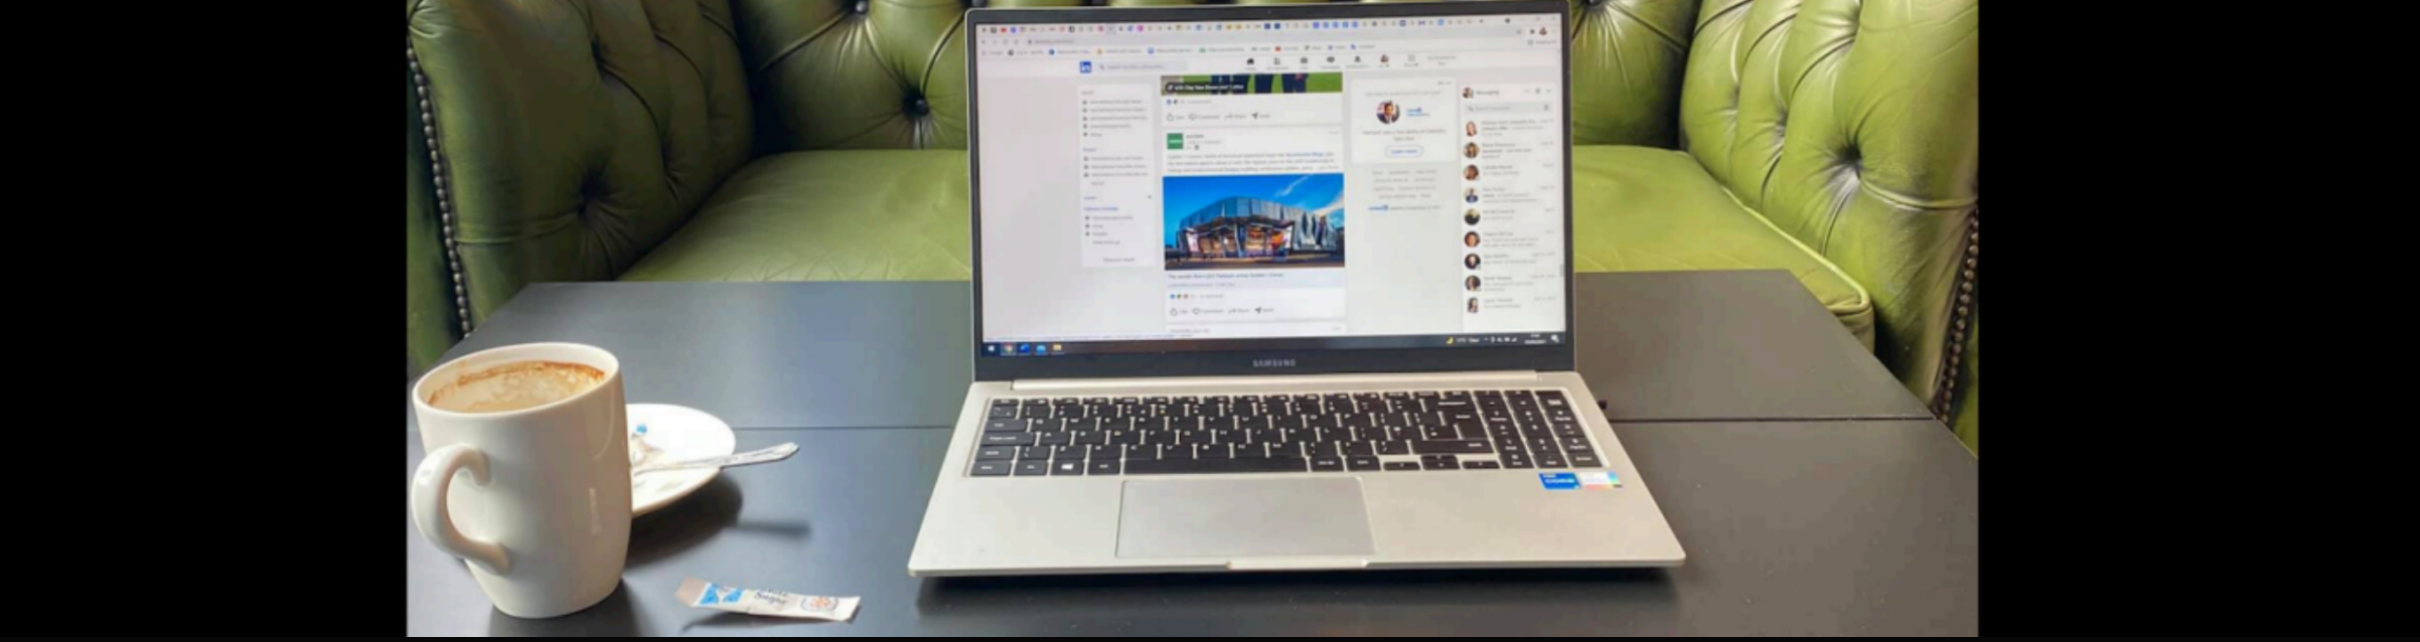

#### HEMANT THAPA

### 1. LOADING LIBRARIES 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.ticker import ScalarFormatter 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET  

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df[:5]

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### 3. PRE PROCESSING 

In [5]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


we have four numerical columns and one categorical column.

In [6]:
#checking matrix of dataset
df.shape

(200, 5)

we have 200 rows and 5 columns. 

In [7]:
#checking missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

we dont have any null values in our dataset. which mean there is no missing values.

In [8]:
#checking unique columns for 'customerID'
df.CustomerID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [10]:
#gender in our dataset
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
#selecting age column and checking unique values
unique_ages = df['Age'].unique()
#sorting unqiue value in ascending order for readibility
sorted_unique_ages = sorted(unique_ages)
#printing sorted unique values
print("Sorted unique ages in ascending order:\n")
print(sorted_unique_ages)

Sorted unique ages in ascending order:

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70]


In [12]:
#selecting salary columns and checking all unqiue salary values
unique_salary = df['Annual Income (k$)'].unique()
#sorting salary in ascending order for readibility 
sorted_unique_salary = sorted(unique_salary)
#printing sorted unique salary values
print('Sorted unique Income in ascending order:\n')
print(sorted_unique_salary)

Sorted unique Income in ascending order:

[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 29, 30, 33, 34, 37, 38, 39, 40, 42, 43, 44, 46, 47, 48, 49, 50, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 85, 86, 87, 88, 93, 97, 98, 99, 101, 103, 113, 120, 126, 137]


In [13]:
#selecting score columns and checking all unqiue score values
unique_score = df['Spending Score (1-100)'].unique()
#sorting salary in ascending order for readibility 
sorted_unique_score = sorted(unique_score)
#printing sorted unique score values
print('Sorted unique Score in ascending order:\n')
print(sorted_unique_score)

Sorted unique Score in ascending order:

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99]


In [14]:
#using lower() method to convert all capital letter to lower case
df.columns = df.columns.str.lower()

In [15]:
#checking columns name
df.columns

Index(['customerid', 'gender', 'age', 'annual income (k$)',
       'spending score (1-100)'],
      dtype='object')

In [16]:
#replacing all white space with '-'
df.columns = [i.replace(' ', '_') for i in df.columns]

In [17]:
df.rename(columns={'customerid': 'customer_id'}, inplace=True)

In [18]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

In [19]:
df[:5]

customer_id  gender  age  annual_income_(k$)  spending_score_(1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40

In [20]:
#if any columns as '_(k$)' than it will replace to '_(dollars)'
df.columns = [x.replace('_(k$)', '_(thousand dollars)') for x in df.columns]

In [21]:
df[:5]

customer_id  gender  age  annual_income_(thousand dollars)  \
0            1    Male   19                                15   
1            2    Male   21                                15   
2            3  Female   20                                16   
3            4  Female   23                                16   
4            5  Female   31                                17   

   spending_score_(1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40

### 4. EDA (EXPLORATORY DATA ANALYSIS)

#### <font color='purple'>4.1 Is there any duplicate customer identification number in our dataset ?<font>

In [22]:
#checking duplicate values in columns for customer id
duplicates = df[df.duplicated(subset='customer_id', keep=False)]

In [23]:
#total duplicates values in customer id columns
len(duplicates)

0

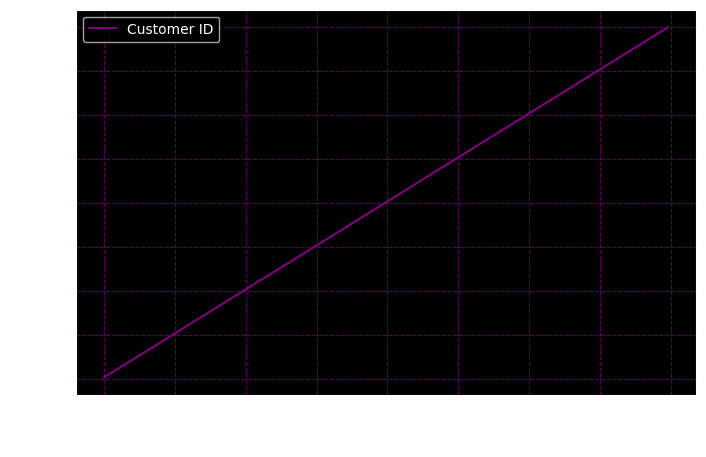

In [24]:
#plotting first columns to visualise or detect any non linear behaviour in our dataset
plt.figure(figsize=(8, 5))
plt.style.use('dark_background')
df['customer_id'].plot(color='purple', label='Customer ID')
plt.xlabel('Rows Index', fontsize=14)
plt.ylabel('Customer ID', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.legend()
plt.show()

As, now we can see that our customer id columns has linear behaviour with our index, which conclude that, we dont have any duplicate or repeating order. all customer are unique.

#### <font color='purple'>4.2 What is our maximum, minimum and average age in our dataset? which age has highest count ?

In [25]:
df['age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

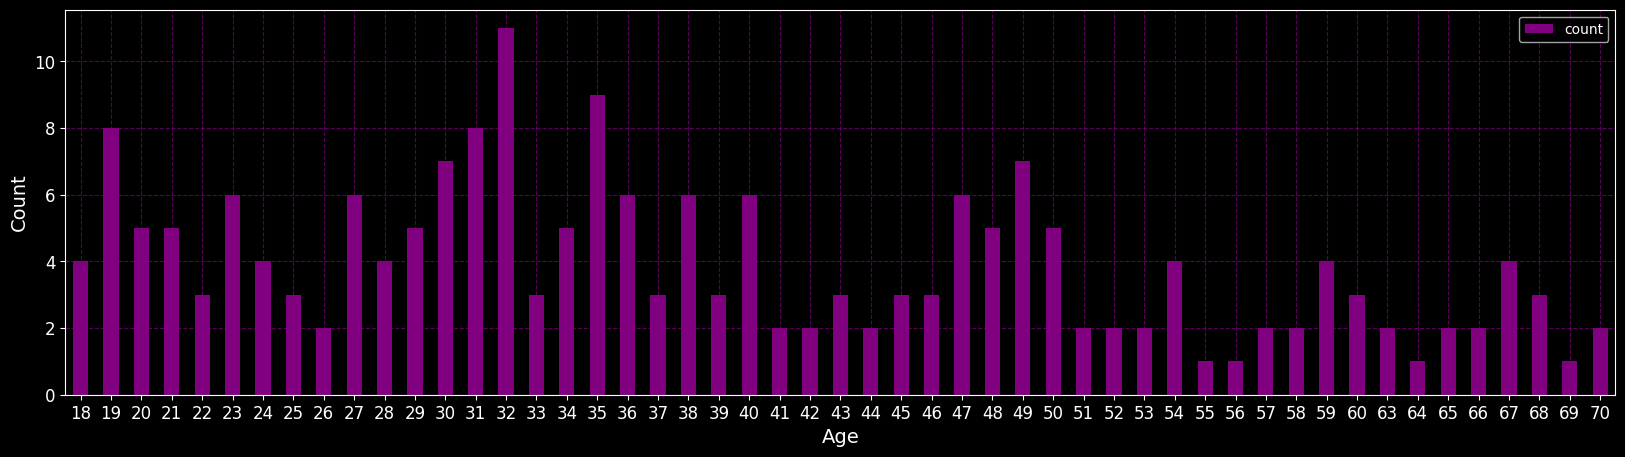

In [26]:
plt.figure(figsize=(20, 5))
plt.style.use('dark_background')
df['age'].value_counts().sort_index().plot(kind='bar', color='purple') 
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels if necessary
plt.yticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.show()

In our customer dataset, our minimum age is 18 year old, mean or average age is around 38 year old and maximum age is 70 year old.

In [27]:
df['age'].value_counts().describe()

count    51.000000
mean      3.921569
std       2.243597
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max      11.000000
Name: count, dtype: float64

When, it comes to highest age count we have 32 year old which is maximum count of 11 customer in our dataset. similary, 64 is minimum count with 1 and only customer. 

#### <font color='purple'> 4.3 Which gender has the highest number of customers? What is the percentage distribution?

In [28]:
df['gender'].value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

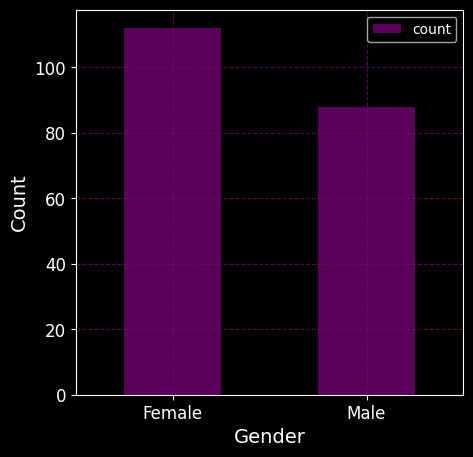

In [29]:
plt.figure(figsize=(5, 5))
plt.style.use('dark_background')
df['gender'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.show()

In [30]:
male_customer = round(df['gender'].value_counts()[1]/len(df) * 100, 2)

print(f'Male customer in our dataset: {male_customer}%')

Male customer in our dataset: 44.0%


In [31]:
female_customer = round(df['gender'].value_counts()[0]/len(df) * 100, 2)

print(f'Female customer in our dataset: {female_customer}%')

Female customer in our dataset: 56.0%


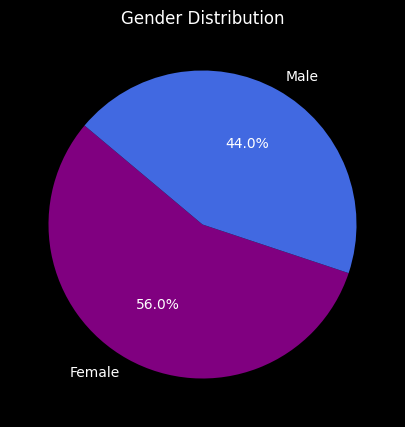

In [32]:
gender_counts = df['gender'].value_counts()

colors = ['purple', 'royalblue']
plt.figure(figsize=(6, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.show()

We have nearly, 112 females and 88 males in our dataset, which is equivalent to 56 percent and 44 percent, which mean we have 12 percent highest amount of women customer in our dataset.

#### <font color='purple'> 4.3 What is the highest occuring income in our dataset? which are highest and lowest paid salary?

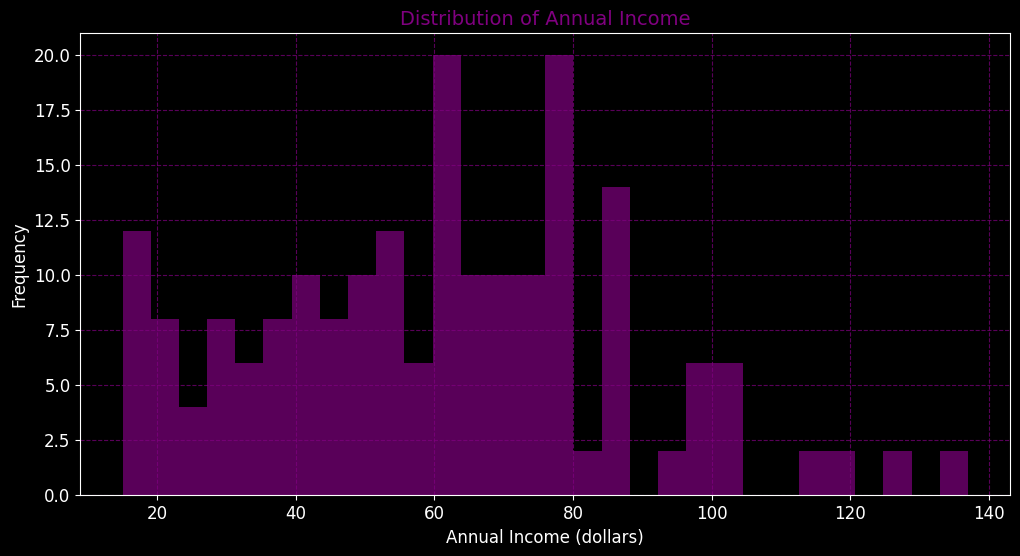

In [33]:
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
plt.hist(df['annual_income_(thousand dollars)'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Annual Income (dollars)', fontsize=12)
plt.ylabel('Frequency',  fontsize=12)
plt.title('Distribution of Annual Income', fontsize=14, color='purple')
plt.grid(True, linestyle='--', color='purple', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

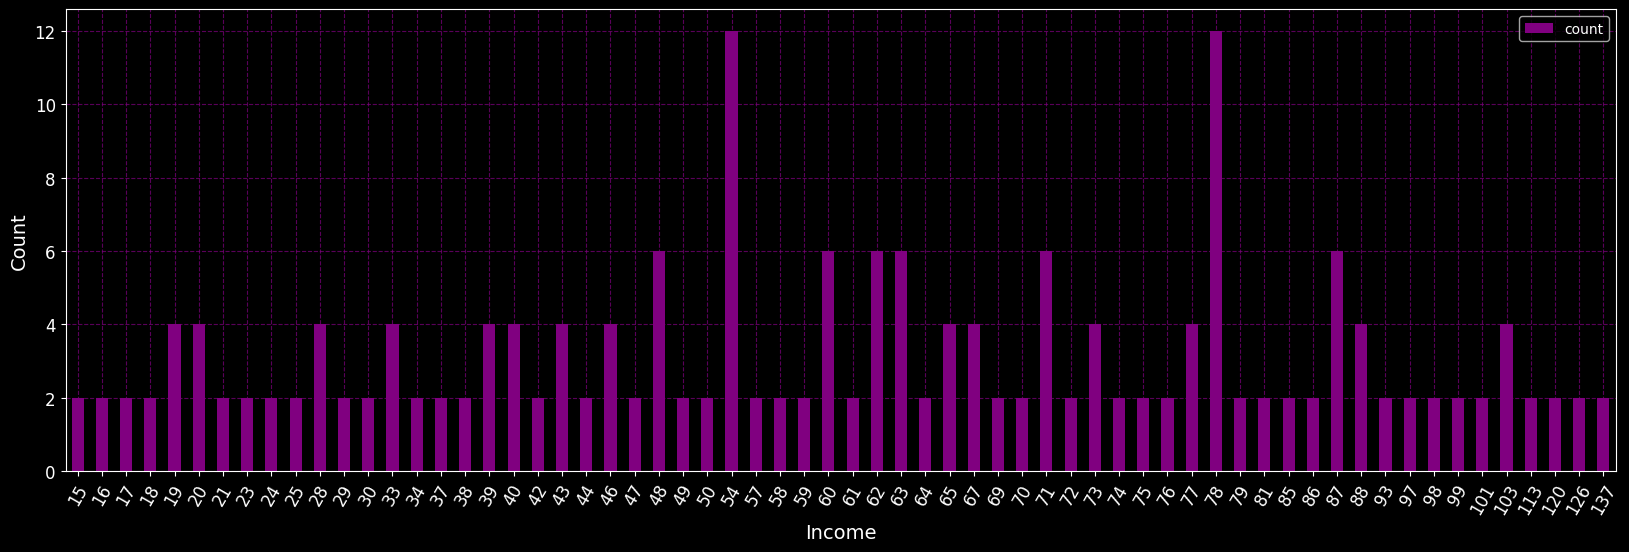

In [34]:
plt.figure(figsize=(20, 6))
plt.style.use('dark_background')
df['annual_income_(thousand dollars)'].value_counts().sort_index().plot(kind='bar', color='purple') 
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=60, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.show()

In [35]:
df['annual_income_(thousand dollars)'].value_counts().sort_index().describe()

count    64.000000
mean      3.125000
std       2.074027
min       2.000000
25%       2.000000
50%       2.000000
75%       4.000000
max      12.000000
Name: count, dtype: float64

When it comes to the highest income among customers, we have two significant counts: 50,000 dollars, with 12 customers, and 77,000 dollars, with a similar count.

When it comes to the lowest income, it is 15000 dollars, and there are two of them. The highest paid salary is 137000 dollars, and there are also two of them.

#### <font color='purple'> 4.3 What are the top five spending score values with the highest frequency or count in our dataset?

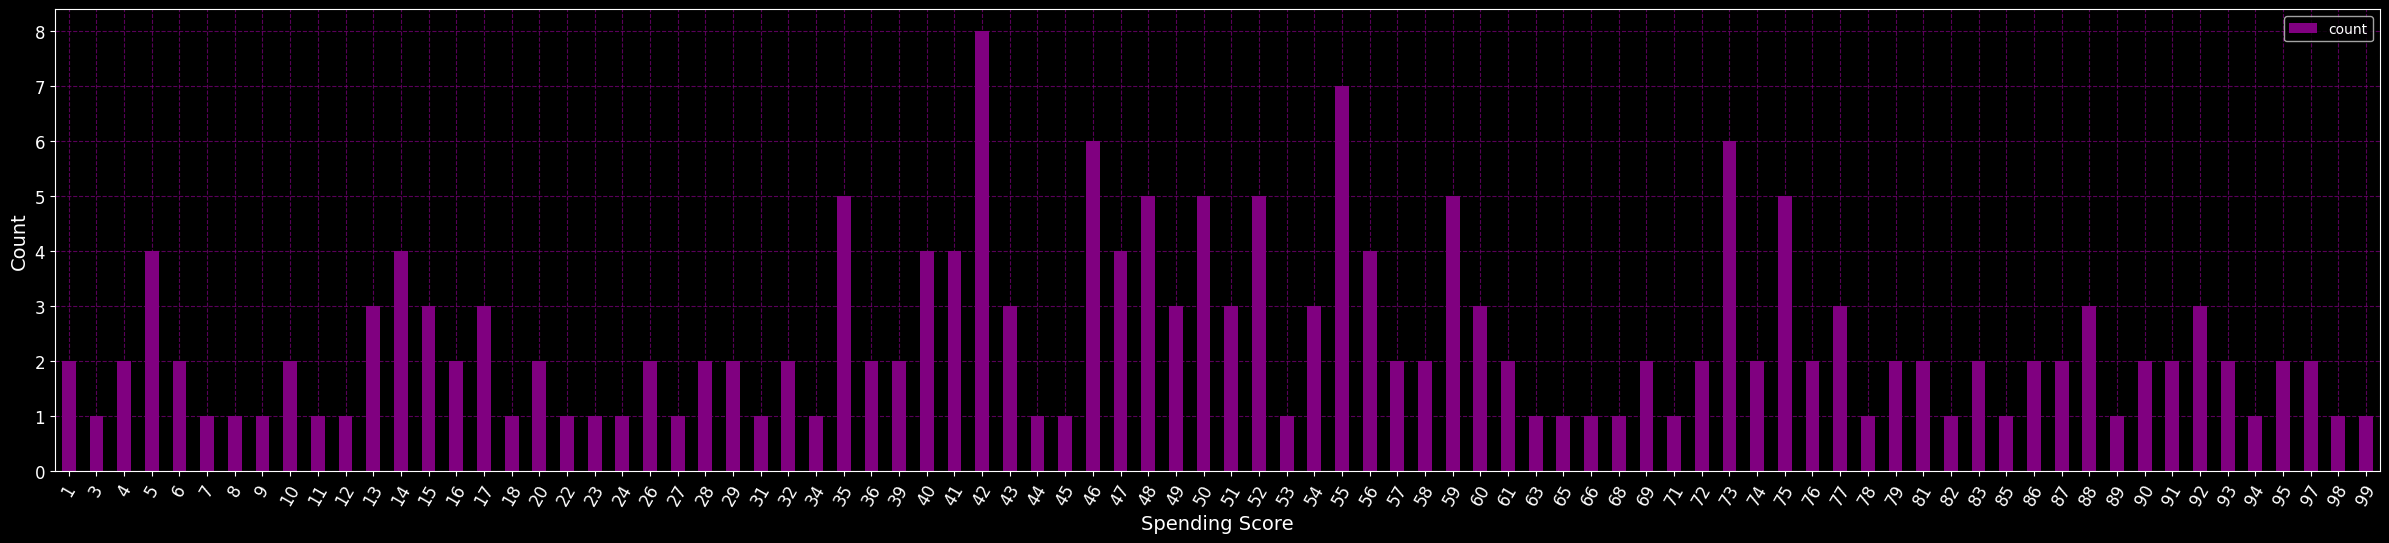

In [36]:
plt.figure(figsize=(30, 6))
plt.style.use('dark_background')
df['spending_score_(1-100)'].value_counts().sort_index().plot(kind='bar', color='purple') 
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=60, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.show()

In [37]:
#sorting by the 'spending_score_(1-100)' column in descending order
sorted_df = df.sort_values(by='spending_score_(1-100)', ascending=False)

In [38]:
sorted_df[:5]

customer_id  gender  age  annual_income_(thousand dollars)  \
11            12  Female   35                                19   
19            20  Female   35                                23   
145          146    Male   28                                77   
185          186    Male   30                                99   
127          128    Male   40                                71   

     spending_score_(1-100)  
11                       99  
19                       98  
145                      97  
185                      97  
127                      95

In [39]:
#count the number of occurrences of each spending score
spending_score_counts = sorted_df['spending_score_(1-100)'].value_counts()
#top five highest count
highest_count = spending_score_counts.head()
highest_count

spending_score_(1-100)
42    8
55    7
46    6
73    6
35    5
Name: count, dtype: int64

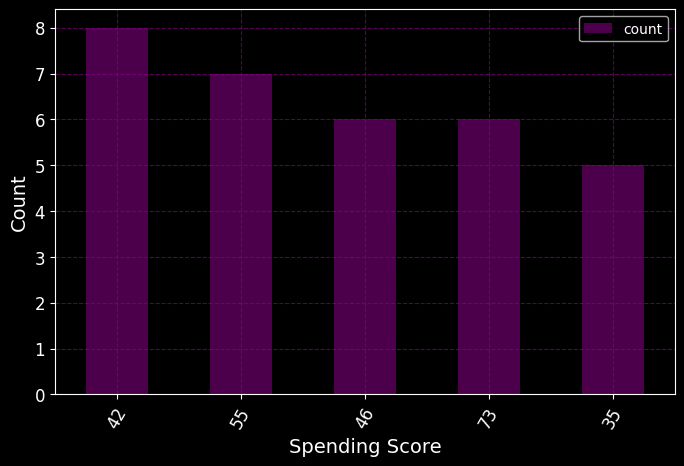

In [40]:
plt.figure(figsize=(8, 5))
plt.style.use('dark_background')
highest_count.plot(kind='bar', color='purple', alpha=0.6)
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=60, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.show()

In our dataset, we've identified the following spending scores with their corresponding frequencies:

- Spending Score 42: Observed 8 times
- Spending Score 55: Observed 7 times
- Spending Score 73: Observed 6 times
- Spending Score 46: Observed 6 times
- Spending Score 52: Observed 5 times

In [41]:
df[:5]

customer_id  gender  age  annual_income_(thousand dollars)  \
0            1    Male   19                                15   
1            2    Male   21                                15   
2            3  Female   20                                16   
3            4  Female   23                                16   
4            5  Female   31                                17   

   spending_score_(1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40

In [42]:
#converting gender into binary digit
from sklearn.preprocessing import LabelEncoder

In [43]:
#creating model
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [44]:
#fit & transforming data
df['gender'] = label_encoder.fit_transform(df['gender'])

In [45]:
df[:5]

customer_id  gender  age  annual_income_(thousand dollars)  \
0            1       1   19                                15   
1            2       1   21                                15   
2            3       0   20                                16   
3            4       0   23                                16   
4            5       0   31                                17   

   spending_score_(1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40

In [46]:
columns_to_drop = ['customer_id'] 
df = df.drop(columns=columns_to_drop)

In [47]:
df_corr = df.corr()
df_corr

gender       age  \
gender                            1.000000  0.060867   
age                               0.060867  1.000000   
annual_income_(thousand dollars)  0.056410 -0.012398   
spending_score_(1-100)           -0.058109 -0.327227   

                                  annual_income_(thousand dollars)  \
gender                                                    0.056410   
age                                                      -0.012398   
annual_income_(thousand dollars)                          1.000000   
spending_score_(1-100)                                    0.009903   

                                  spending_score_(1-100)  
gender                                         -0.058109  
age                                            -0.327227  
annual_income_(thousand dollars)                0.009903  
spending_score_(1-100)                          1.000000

gender vs. age (0.060867): The correlation between 'gender' and 'age' is positive but relatively weak. This suggests a very slight positive relationship between gender and age, but it's not a strong correlation.

gender vs. annual_income_(dollars) (0.056410): Similar to the previous case, there is a positive but weak correlation between 'gender' and 'annual_income_(dollars)'.

gender vs. spending_score_(1-100) (-0.058109): There is a negative but weak correlation between 'gender' and 'spending_score_(1-100)'. This suggests that there might be a slight negative relationship between gender and spending score, but the correlation is not strong.

age vs. annual_income_(dollars) (-0.012398): The correlation between 'age' and 'annual_income_(dollars)' is slightly negative but weak. This suggests that there might be a slight negative relationship between age and annual income, but it's not significant.

annual_income_(dollars) vs. spending_score_(1-100) (0.009903): There is a very weak positive correlation between 'annual_income_(dollars)' and 'spending_score_(1-100)', indicating a slight positive relationship between these two variables.

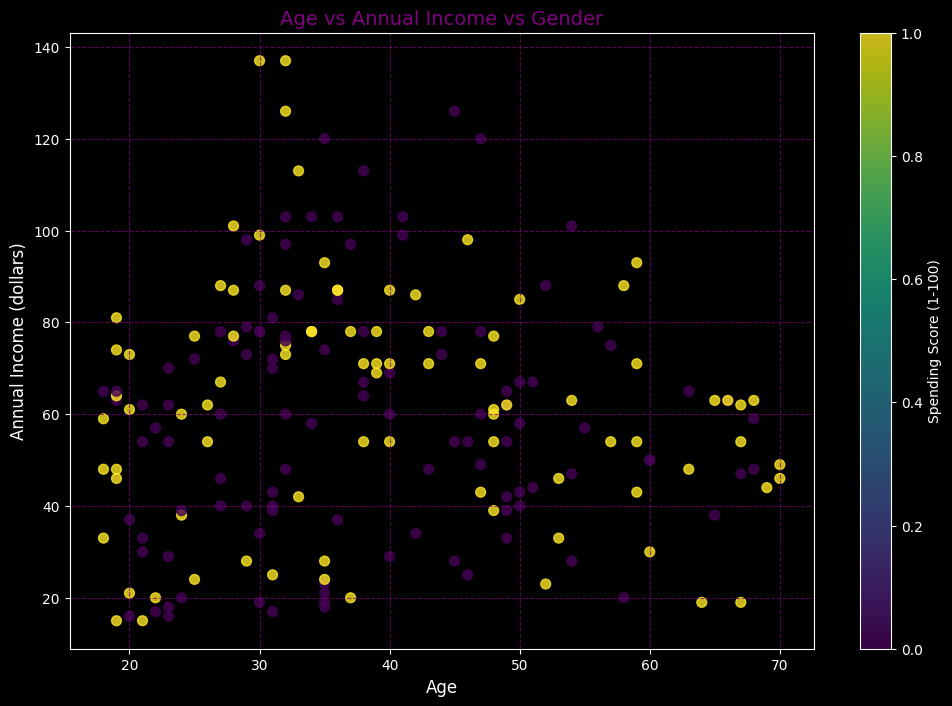

In [48]:
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.scatter(x='age', y='annual_income_(thousand dollars)', c='gender', data=df, cmap='viridis', alpha=0.8, s=50)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income (dollars)', fontsize=12)
plt.title('Age vs Annual Income vs Gender', fontsize=14, color='purple')
plt.colorbar(label='Spending Score (1-100)')
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.show()

We gain a comprehensive understanding of the relationship between Age and Annual Income. 

Notably, customers aged between 30 and 35 years old tend to exhibit the highest annual income, suggesting a peak in earning potential during this age range.

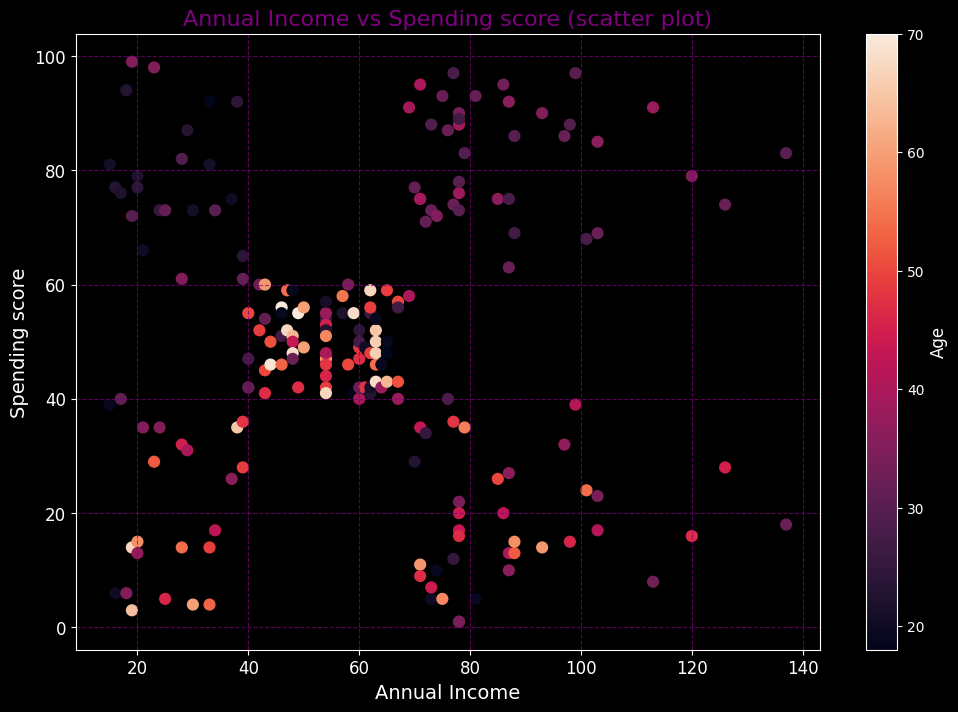

In [49]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
#selecting color columns
colors=df['age']
#color of scatter
cmap = plt.get_cmap('rocket')
#scatterplot x, y axis
#setting colors according to age
#setting color map to rocket
scatter = plt.scatter(df['annual_income_(thousand dollars)'], 
                      df['spending_score_(1-100)'], c=colors, cmap=cmap, s=60)
#creating color bar according to age
cbar = plt.colorbar(scatter)
#labeling cbar 
cbar.set_label('Age', fontsize=12)
plt.title('Annual Income vs Spending score (scatter plot)', fontsize=16, color='purple')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending score', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, ls='--', color='purple', alpha=0.7)
plt.show()

### Feature Selection 

In [50]:
#feature columns
columns = df.columns[2:5]

In [51]:
columns

Index(['annual_income_(thousand dollars)', 'spending_score_(1-100)'], dtype='object')

In [52]:
#selecting features
X = df[columns]

In [53]:
X[:5]

annual_income_(thousand dollars)  spending_score_(1-100)
0                                15                      39
1                                15                      81
2                                16                       6
3                                16                      77
4                                17                      40

### KMEAN CLUSTERING 

## K-Means Clustering

K-means clustering is a fundamental and widely-used unsupervised machine learning algorithm. In K-means, we aim to group data points into clusters based on their similarity, without using any prior labels or outcomes.

### Key Concepts

- **Centroids:** In K-means, we define a target number 'k', representing the number of centroids. Each centroid is a center point of a cluster.

- **Data Point Assignment:** Every data point is assigned to one of the 'k' clusters based on its similarity to the centroids. Typically, the similarity is measured using the Euclidean distance.

    $$
    \text{Distance}(x_i, C_j) = \sqrt{\sum_{d=1}^{D} (x_{i,d} - C_{j,d})^2}
    $$

    - $x_i$: Data point
    - $C_j$: Centroid
    - $D$: Dimensionality of the data

- **Centroid Update:** New centroids are calculated for each cluster by finding the mean of all data points assigned to that cluster:

    $$
    \text{Centroid (C)}_j = \frac{1}{N_j} \sum_{i=1}^{N_j} x_i
    $$

    - $\text{Centroid (C)}_j$: Centroid for cluster 'j'
    - $N_j$: Number of data points in cluster 'j'

### Iterative Process

The K-means algorithm iteratively assigns data points to clusters and updates the centroids. This process continues until either the centroids no longer change significantly or a predefined number of iterations is reached.#

### Objective

K-means clustering aims to minimize the within-cluster sum of squares, which represents the sum of squared distances between data points and their assigned centroids.

1. **Initialization**: Start by selecting 'k' initial centroids, either randomly or using a specific strategy.
2. **Assignment**: Every data point is then assigned to the nearest centroid based on a distance metric, typically Euclidean distance.
3. **Update Centroids**: Calculate new centroids for each cluster based on the data points assigned to them. Centroids are recalculated as the mean of the data in each cluster.
4. **Repeat**: Steps 2 and 3 are repeated until convergence, meaning the centroids no longer change significantly.

### Applications

K-means clustering is used in various applications, including customer segmentation, image compression, and pattern recognition, to discover natural groupings within data.

By the end of the algorithm, you obtain 'k' centroids and each data point belongs to the cluster represented by its nearest centroid. K-means is a valuable tool for exploratory data analysis and data-driven insights.


In [54]:
from sklearn.cluster import KMeans

In [55]:
#defining a function to plot the elbow method for KMeans clustering
def plot_elbow_method(n_clusters_list, X):
    #calculatinh the number of subplots based on the number of n_clusters_list
    num_subplots = len(n_clusters_list)
    #the number of columns to a maximum of 3
    num_cols = min(3, num_subplots)  
    #the number of rows
    num_rows = (num_subplots + num_cols - 1) // num_cols  
    #figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 5 * num_rows))
    for i, n_clusters in enumerate(n_clusters_list):
        inertias = []

        #the inertia for different values of n_clusters
        for n in n_clusters:
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X)
            inertias.append(kmeans.inertia_)
            
        #the row and column for the current subplot
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        #plotting the elbow method graph
        plt.style.use('dark_background')
        sns.lineplot(x=n_clusters, y=inertias, ax=ax, color='purple', lw=3, marker='o')
        ax.set_title(f'Elbow Method for k = {n_clusters}', fontsize=14)
        ax.set_xlabel('Clusters', fontsize=12)
        ax.set_ylabel('Inertia', fontsize=12)
        ax.yaxis.set_tick_params(labelsize=12)
        ax.xaxis.set_tick_params(labelsize=12)
        ax.grid(True, ls='--', color='purple', alpha=0.5, lw=1)
        ax.yaxis.get_major_formatter().set_scientific(False)
    plt.suptitle('Searching for Elbow', fontsize=16)
    plt.tight_layout()
    plt.show()


In [74]:
#values to explore in the elbow method
n_clusters_list = [
    [1],               #evaluating a single cluster
    [1, 2],            #evaluating 1 & 2 clusters
    [1, 2, 3],         #evaluating 1, 2, & 3 clusters
    [1, 2, 3, 4],      #evaluating 1, 2, 3, & 4 clusters
    [1, 2, 3, 4, 5],   #evaluating 1, 2, 3, 4, & 5 clusters
    [1, 2, 3, 4, 6, 8, 9 ,10]    #evaluating 1, 2, 3, 4, & 6 clusters
]

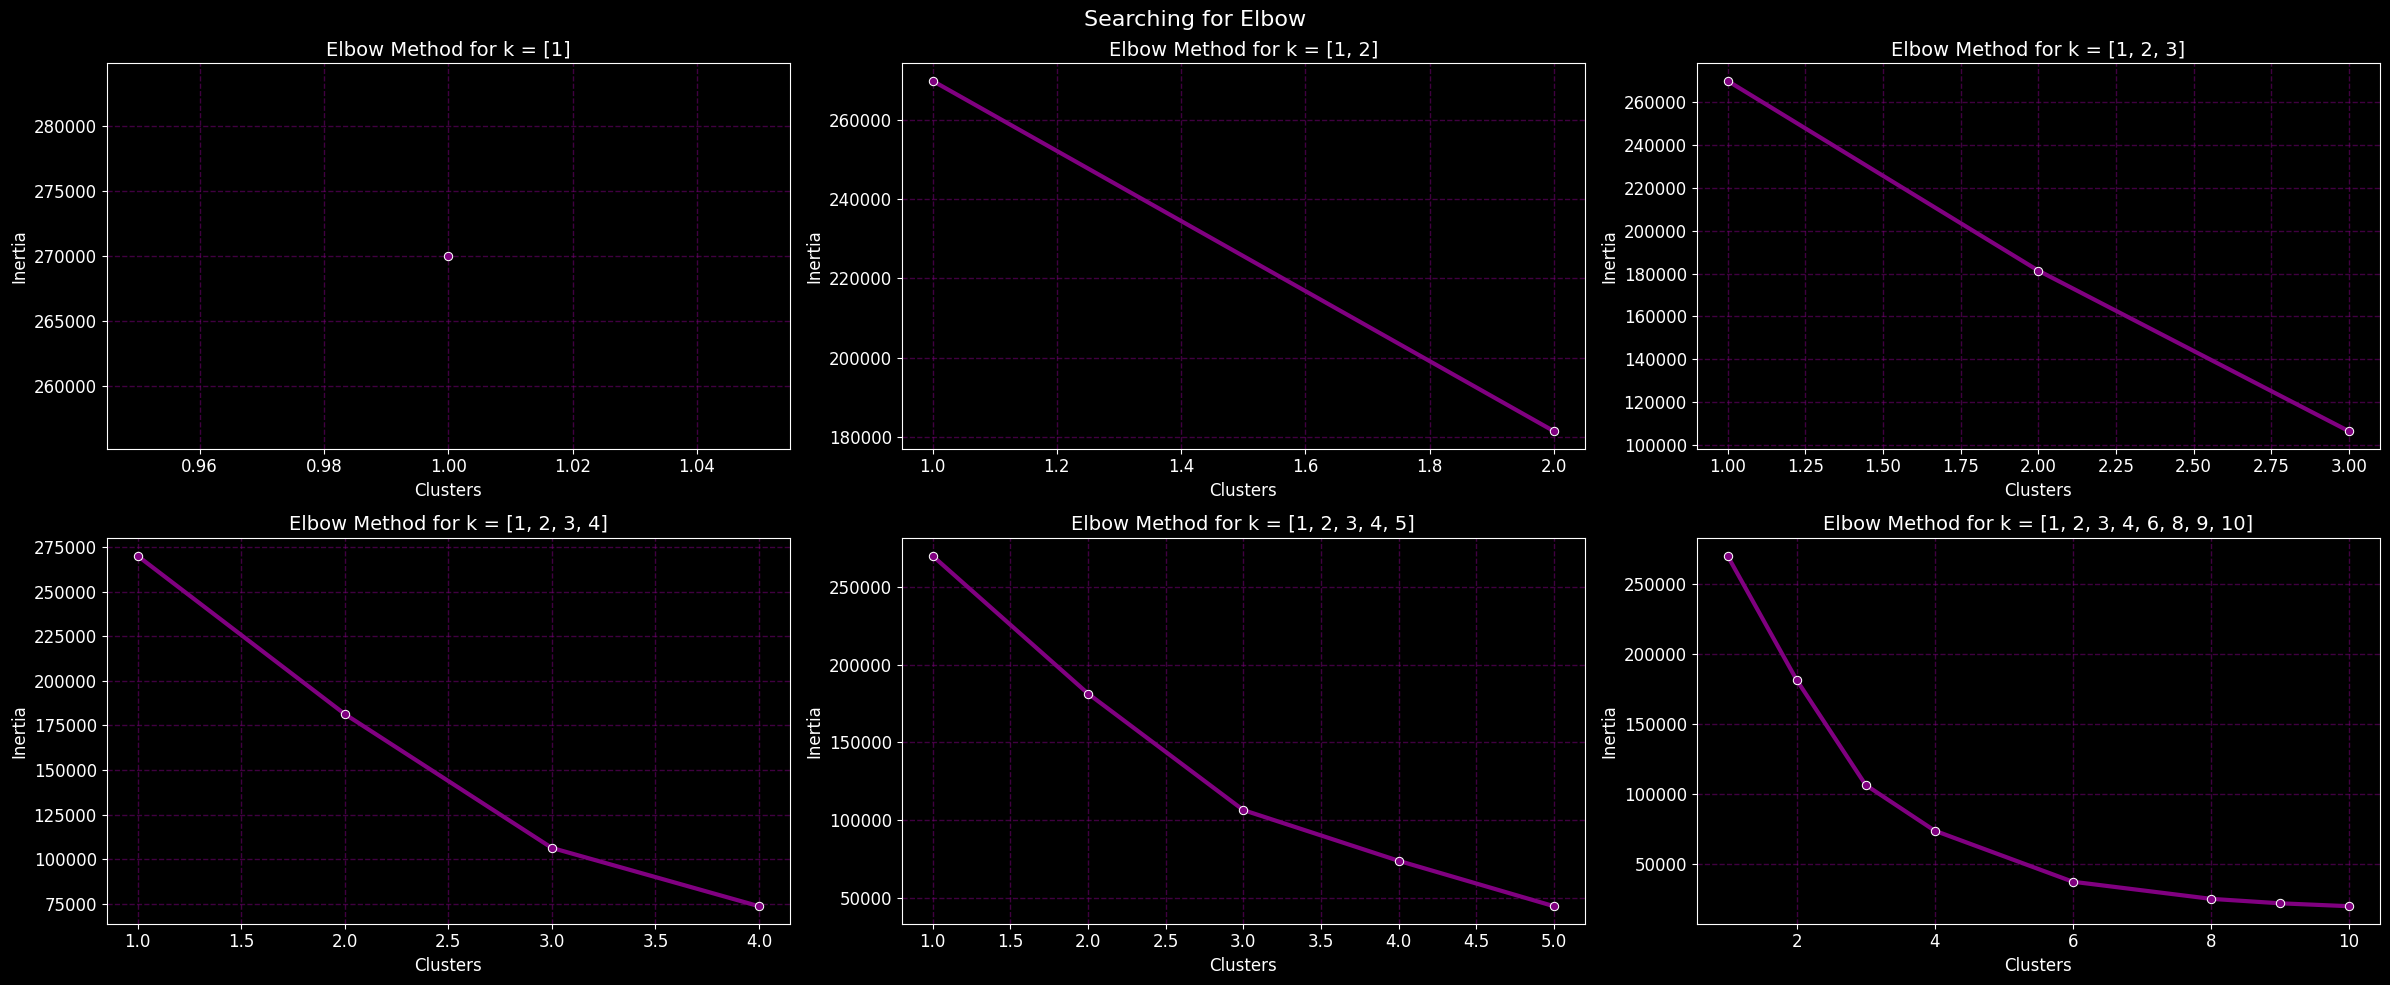

In [75]:
#plotting kmean from 1 to 6
plot_elbow_method(n_clusters_list, X)

As we increment the value of 'k' from 1 to 6 in K-means clustering, we observe that the algorithm converges to a specific number of clusters. This convergence is a result of finding the optimal number of centroids to partition the data effectively.

In the beginning, with 'k' set to 1, the algorithm groups all data points into a single cluster, which doesn't provide much insight into the underlying patterns in the data. As 'k' increases, the algorithm tries to divide the data into smaller, more meaningful clusters.

In [58]:
def plot_kmeans_cluster(X, df, k_values):
    #seaborn style and color palette
    plt.style.use('dark_background')
    #calculatinh the number of rows and columns for subplots
    num_subplots = len(k_values)
    #maximum of 3 columns
    num_cols = min(3, num_subplots)  
    num_rows = (num_subplots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
    
    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=0)
        df['cluster'] = kmeans.fit_predict(X)
        
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.scatterplot(x=X.columns[0],  
                        y=X.columns[1],
                        hue='cluster',
                        data=df,
                        palette='viridis',  
                        s=100,
                        ax=ax)
        ax.set_title(f'k = {k}', fontsize=18)
        ax.set_xlabel(X.columns[0], fontsize=16)
        ax.set_ylabel(X.columns[1], fontsize=16)
        ax.yaxis.set_tick_params(labelsize=14)
        ax.xaxis.set_tick_params(labelsize=14)
        ax.grid(True, ls='--', color='purple', alpha=0.5, lw=1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

    plt.suptitle('Customer Segmentation with K-Means Clustering', fontsize=20)
    plt.tight_layout()
    plt.show()

In [76]:
#the number of clusters (k)
k = [1, 2, 3, 4, 5, 6, 7 , 8 , 9, 10]

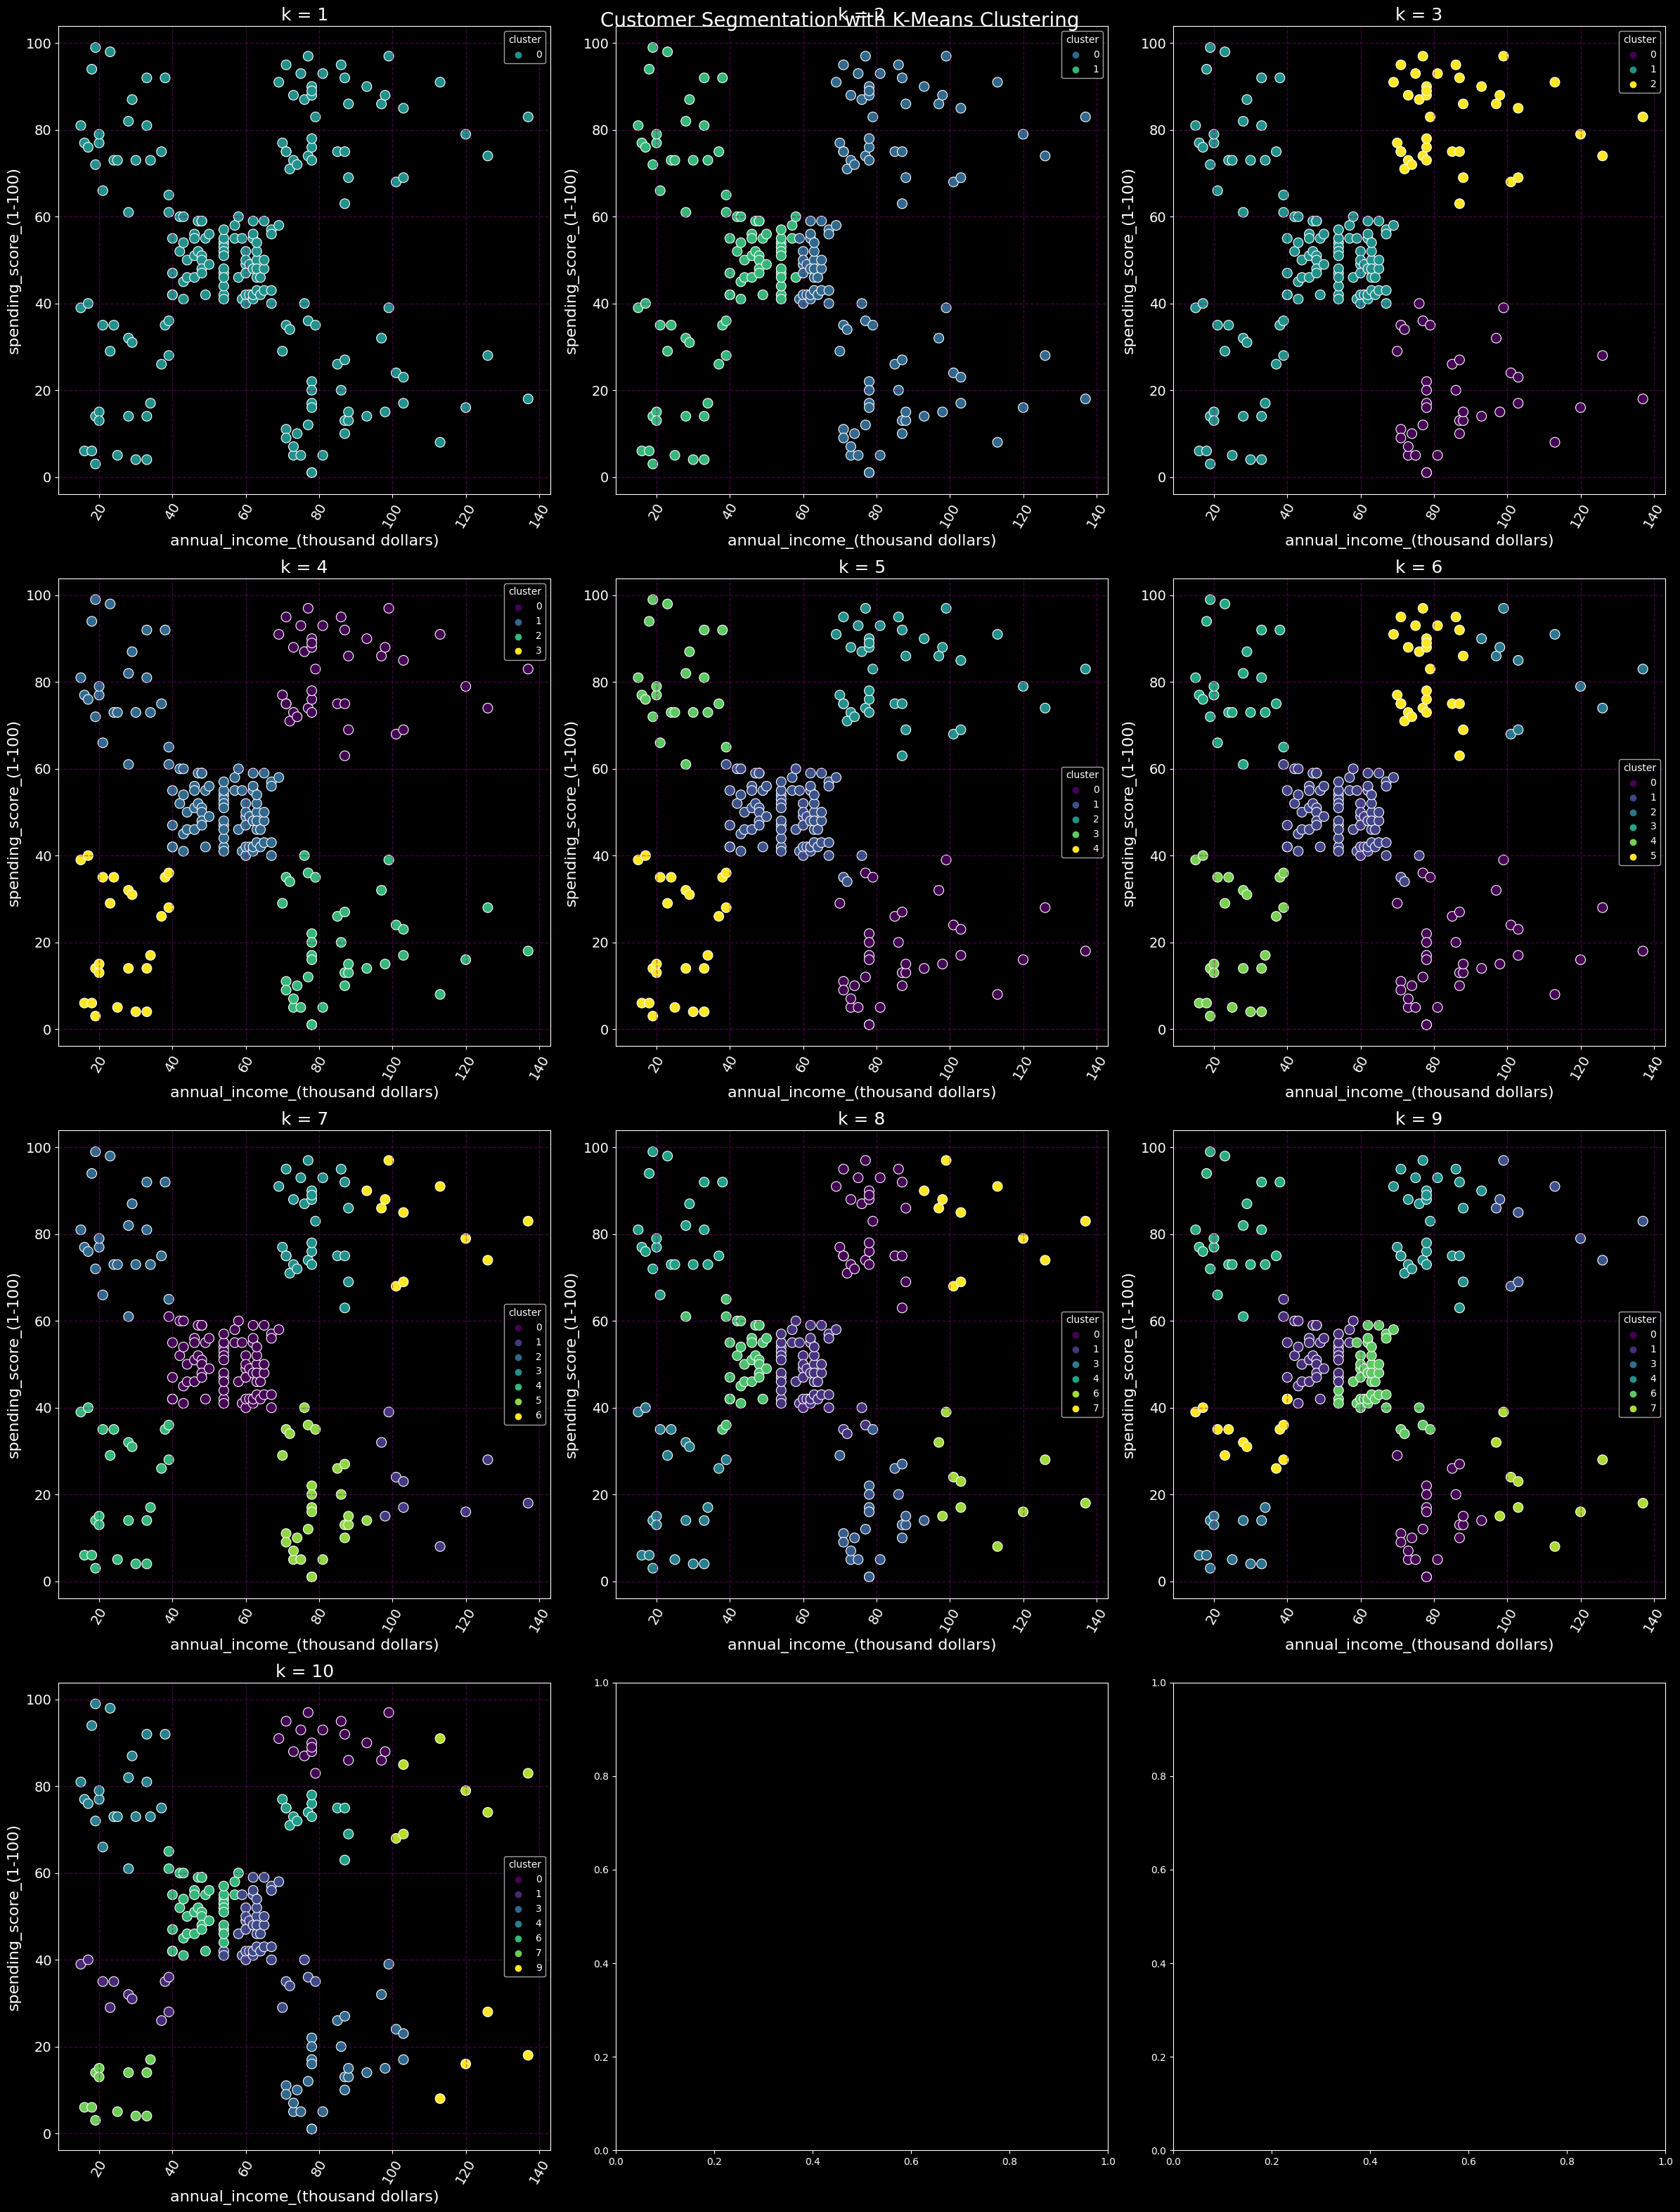

In [77]:
plot_kmeans_cluster(X, df, k)

After experimenting with different values of k, we have determined that k=5 is the optimal number of clusters for our customer segmentation. 

This choice allows us to effectively group customers based on their annual income and spending score, providing valuable insights into their behavior and preferences.

### Final Kmean Cluster with value of k equal to 5

In [61]:
#the number of clusters (k)
k = 5

In [62]:
#fit K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

In [63]:
df[:5]

gender  age  annual_income_(thousand dollars)  spending_score_(1-100)  \
0       1   19                                15                      39   
1       1   21                                15                      81   
2       0   20                                16                       6   
3       0   23                                16                      77   
4       0   31                                17                      40   

   cluster  
0        4  
1        3  
2        4  
3        3  
4        4

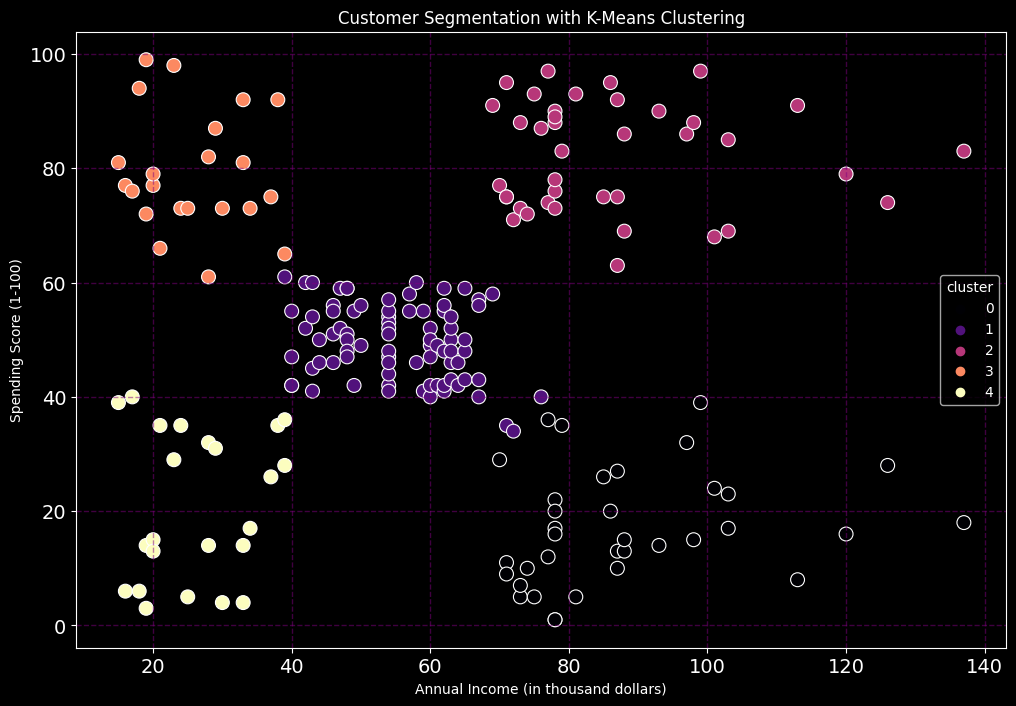

In [64]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='annual_income_(thousand dollars)', 
                y='spending_score_(1-100)', 
                hue='cluster', data=df, palette='magma', s=100)
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Annual Income (in thousand dollars)')
plt.ylabel('Spending Score (1-100)')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True, ls='--', color='purple', alpha=0.5, lw=1)
plt.show()

**Customer Segmentation based on K-Means Clustering**

After careful analysis and experimenting with different values of k, we have identified the optimal number of clusters for our customer segmentation. We found that k=5 provides the most meaningful division of our customer base.

Here's what each of the five clusters represents:

- **Cluster 0**: Customers in this group have high annual income and low spending scores.
- **Cluster 1**: Customers here exhibit mid annual income and mid spending scores.
- **Cluster 2**: This cluster consists of customers with high annual income and high spending scores.
- **Cluster 3**: Customers in this group have low annual income and high spending scores.
- **Cluster 4**: low annual income and low spending scores characterize this cluster.

### HIERARCHICAL CLUSTERING

### Hierarchical Clustering

Hierarchical clustering starts by treating each data point as a single cluster and then repeatedly merges or splits clusters to form a hierarchy. This process is guided by a linkage criterion, which defines the similarity or dissimilarity between clusters. The most common linkage methods are:

#### Single Linkage (Minimum Linkage)
This method measures the distance between the closest data points of two clusters.

$$
d_{\text{min}}(C_i, C_j) = \min_{x \in C_i, y \in C_j} \text{dist}(x, y)
$$
#### Complete Linkage (Maximum Linkage)
It calculates the distance between the farthest data points in two clusters.

$$
d_{\text{max}}(C_i, C_j) = \max_{x \in C_i, y \in C_j} \text{dist}(x, y)
$$

#### Average Linkage
This method computes the average distance between all pairs of data points in two clusters.

$$
d_{\text{avg}}(C_i, C_j) = \frac{1}{|C_i| |C_j|} \sum_{x \in C_i, y \in C_j} \text{dist}(x, y)
$$

In these equations:
- **$d_{min}(C_i, C_j)$** represents the distance between clusters **$C_i$** and **$C_j$** using the single linkage method.
- **$d_{max}(C_i, C_j)$** represents the distance between clusters **$C_i$** and **$C_j$** using the complete linkage method.
- **$d_{avg}(C_i, C_j)$** represents the distance between clusters **$C_i$** and **$C_j$** using the average linkage method.
- **$x$** and **$y$** are data points within clusters **$C_i$** and **$C_j$**.
- **$dist(x, y)$** is the distance between data points **$x$** and **$y$**.
- **$|C_i|$** and **$|C_j|$** denote the number of data points in clusters **$C_i$** and **$C_j$**.


In [65]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix

In [66]:
X[:5]

annual_income_(thousand dollars)  spending_score_(1-100)
0                                15                      39
1                                15                      81
2                                16                       6
3                                16                      77
4                                17                      40

In [67]:
#hierarchical clustering
n_clusters = 6  #number of clusters
agglomerative_clusters = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agglomerative_clusters.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [68]:
#add cluster labels to the DataFrame
df['labels'] = agglomerative_clusters.labels_

In [69]:
df[:5]

gender  age  annual_income_(thousand dollars)  spending_score_(1-100)  \
0       1   19                                15                      39   
1       1   21                                15                      81   
2       0   20                                16                       6   
3       0   23                                16                      77   
4       0   31                                17                      40   

   cluster  labels  
0        4       0  
1        3       3  
2        4       0  
3        3       3  
4        4       0

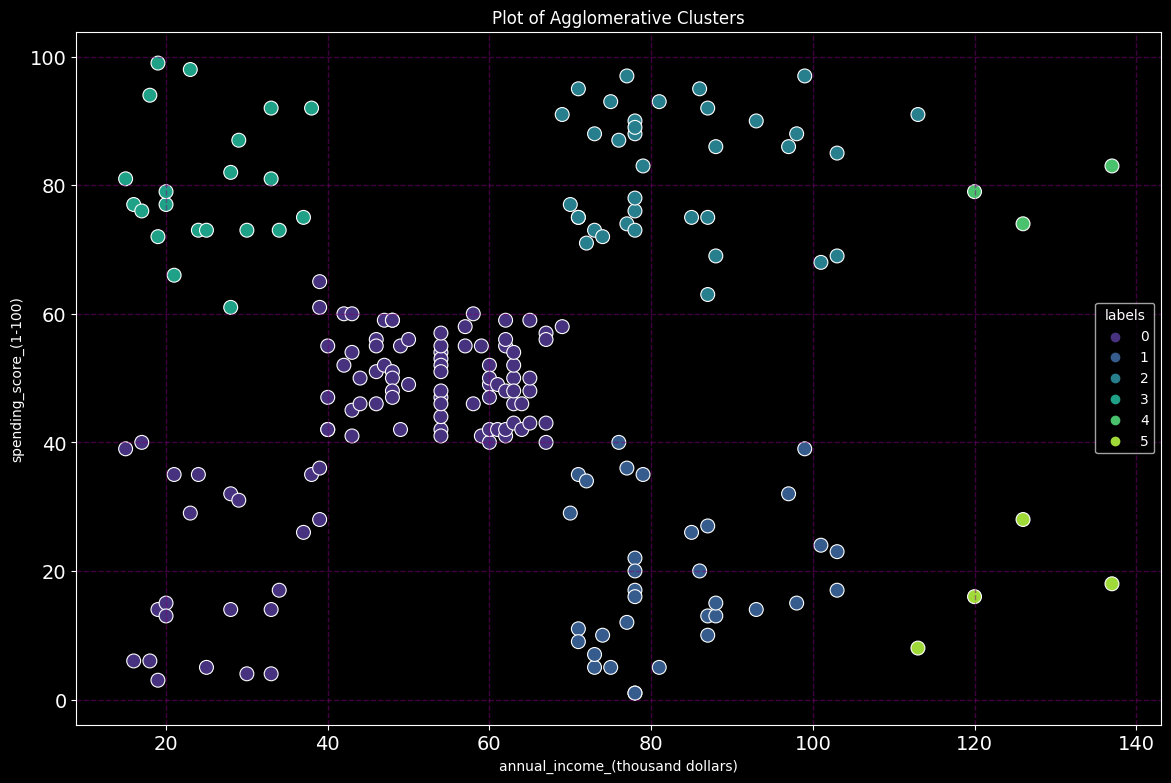

In [70]:
#Plot the clusters
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df, x='annual_income_(thousand dollars)', y='spending_score_(1-100)',
                hue='labels', palette=sns.color_palette('viridis', n_clusters), s=100)
plt.title('Plot of Agglomerative Clusters')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True, ls='--', color='purple', alpha=0.5, lw=1)

plt.show()

In [71]:
dist_matrix = distance_matrix(X, X)

In [72]:
Z = hierarchy.linkage(dist_matrix, 'complete')

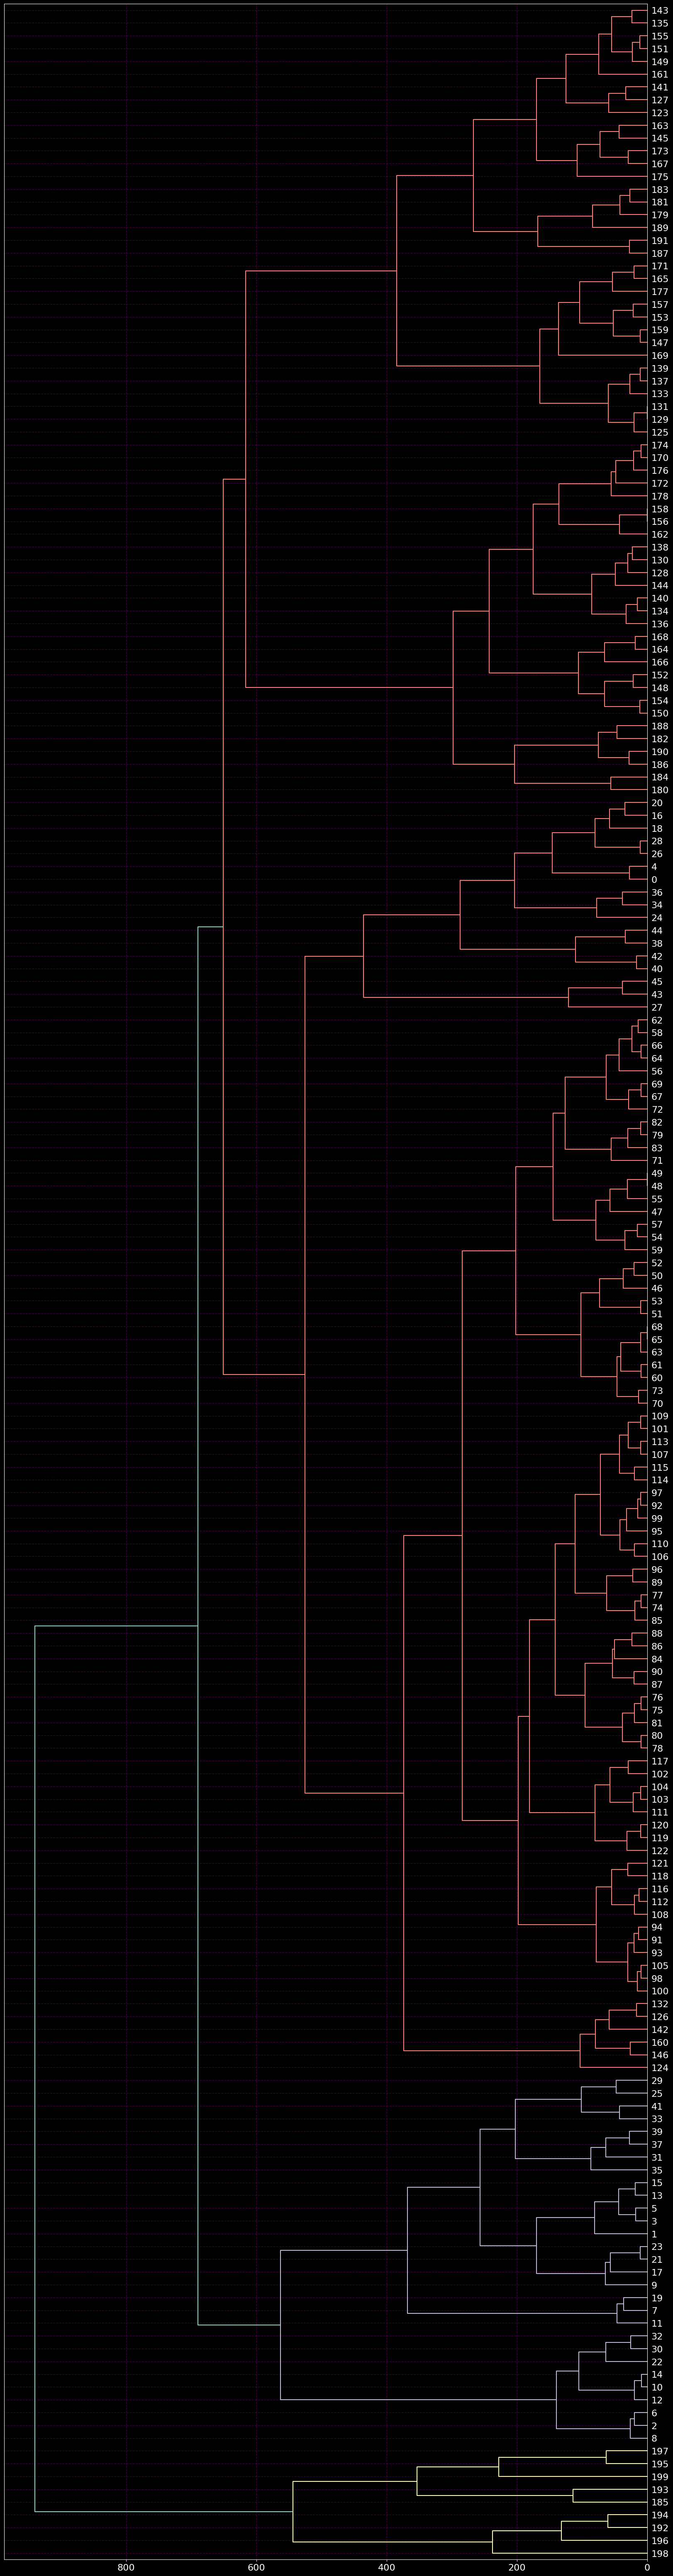

In [73]:
plt.figure(figsize=(20, 80))
cluster_dendrograms = hierarchy.dendrogram(Z, leaf_rotation=0, 
                                           leaf_font_size=20, orientation='left')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, ls='--', color='purple', alpha=0.5, lw=1)
plt.show()

### References:

[Customer Segmentation Tutorial in Python](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

[K-means Clustering on Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

[sklearn.cluster.KMeans Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[K-means Clustering Article on Neptune.ai](https://neptune.ai/blog/k-means-clustering)